# Bank Account Assessment Project Part 2
Using Scikit-Learn and model avaliation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# enhance plot quality
plt.rcParams["figure.dpi"] = 400

In [4]:
df = pd.read_csv("Chapter_1_cleaned_data.csv")

In [5]:
# the data shown below has a difference of samples
# although it still can be considered balanced
# for unbalanced data, it should be applied
# undersampling, oversampling or weighting samples

print(df["default payment next month"].mean(), "\n")
df.groupby("default payment next month")["ID"].count()

0.2217971797179718 



default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
my_lr = LogisticRegression()

In [8]:
params = my_lr.get_params()
params

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [9]:
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False,
                               fit_intercept=True,
                              intercept_scaling=1, max_iter=100, multi_class="auto",
                              n_jobs=None, penalty="l2", random_state=None, solver="warn",
                              tol=0.0001, verbose=0, warm_start=False)

In [10]:
my_new_lr.C = 0.1
my_new_lr.solver = "liblinear"
new_params = my_new_lr.get_params()
new_params

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
# selecting the first 10 values from EDUCATION
X = df["EDUCATION"][0:10].values.reshape(-1, 1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [12]:
# selecting the first 10 values from default payment next month
# this is the response variable
Y = df["default payment next month"][0:10].values
Y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
# after running this cell, the model is trained with the data
my_new_lr.fit(X, Y)
my_new_lr.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
# after training the model, let's test it
new_X = df["EDUCATION"][10:20].values.reshape(-1, 1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [15]:
# predict with the trained model
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
# verify correct answers
df["default payment next month"][10:20].values

# after the test, it can be seen that the model got 80% of "right answers"
# but it didn't predict any 1 as answer, which is not good

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [17]:
# generating random data as independent variable
np.random.seed(seed=1)
X = np.random.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [18]:
# generating random dependent variable
np.random.seed(seed=1)
slope = 0.25
intercept = -1.25
y = slope*X + np.random.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

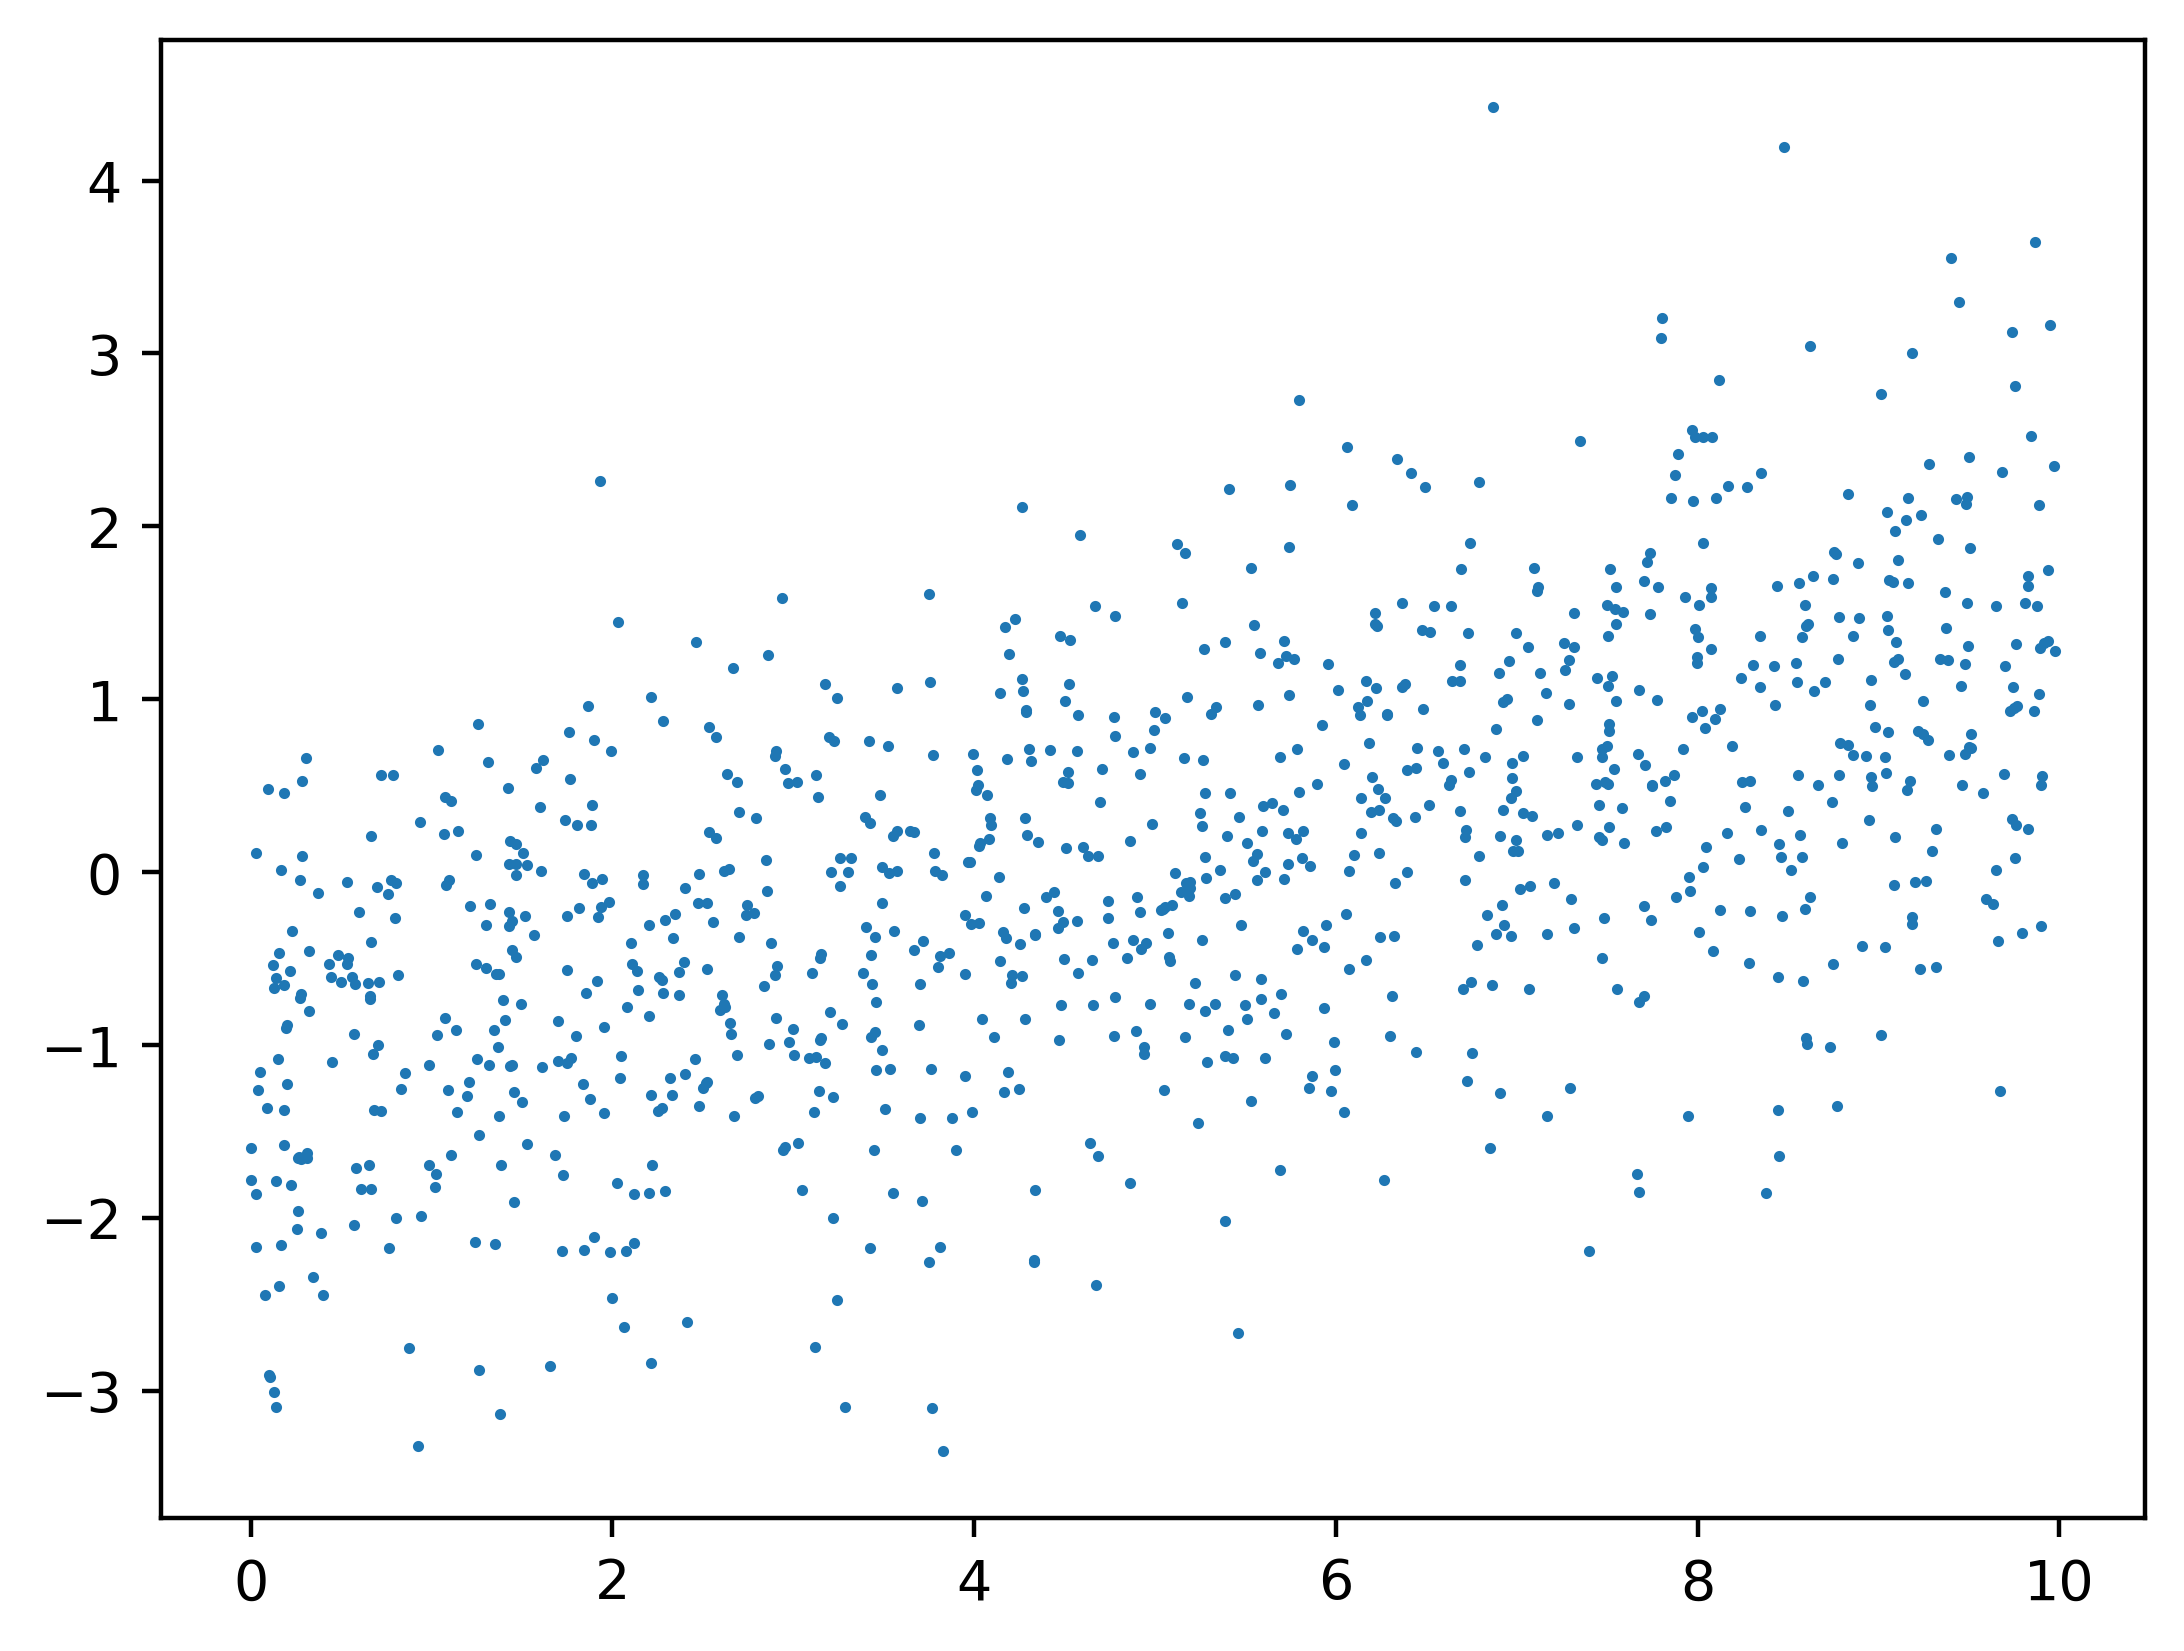

In [19]:
plt.rcParams["figure.dpi"] = 400
plt.scatter(X, y, s=1)

In [20]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [21]:
lin_reg.fit(X.reshape(-1, 1), y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.161256600282589
[0.24002588]


In [22]:
# use the model to predict dependent variable
y_pred = lin_reg.predict(X.reshape(-1, 1))

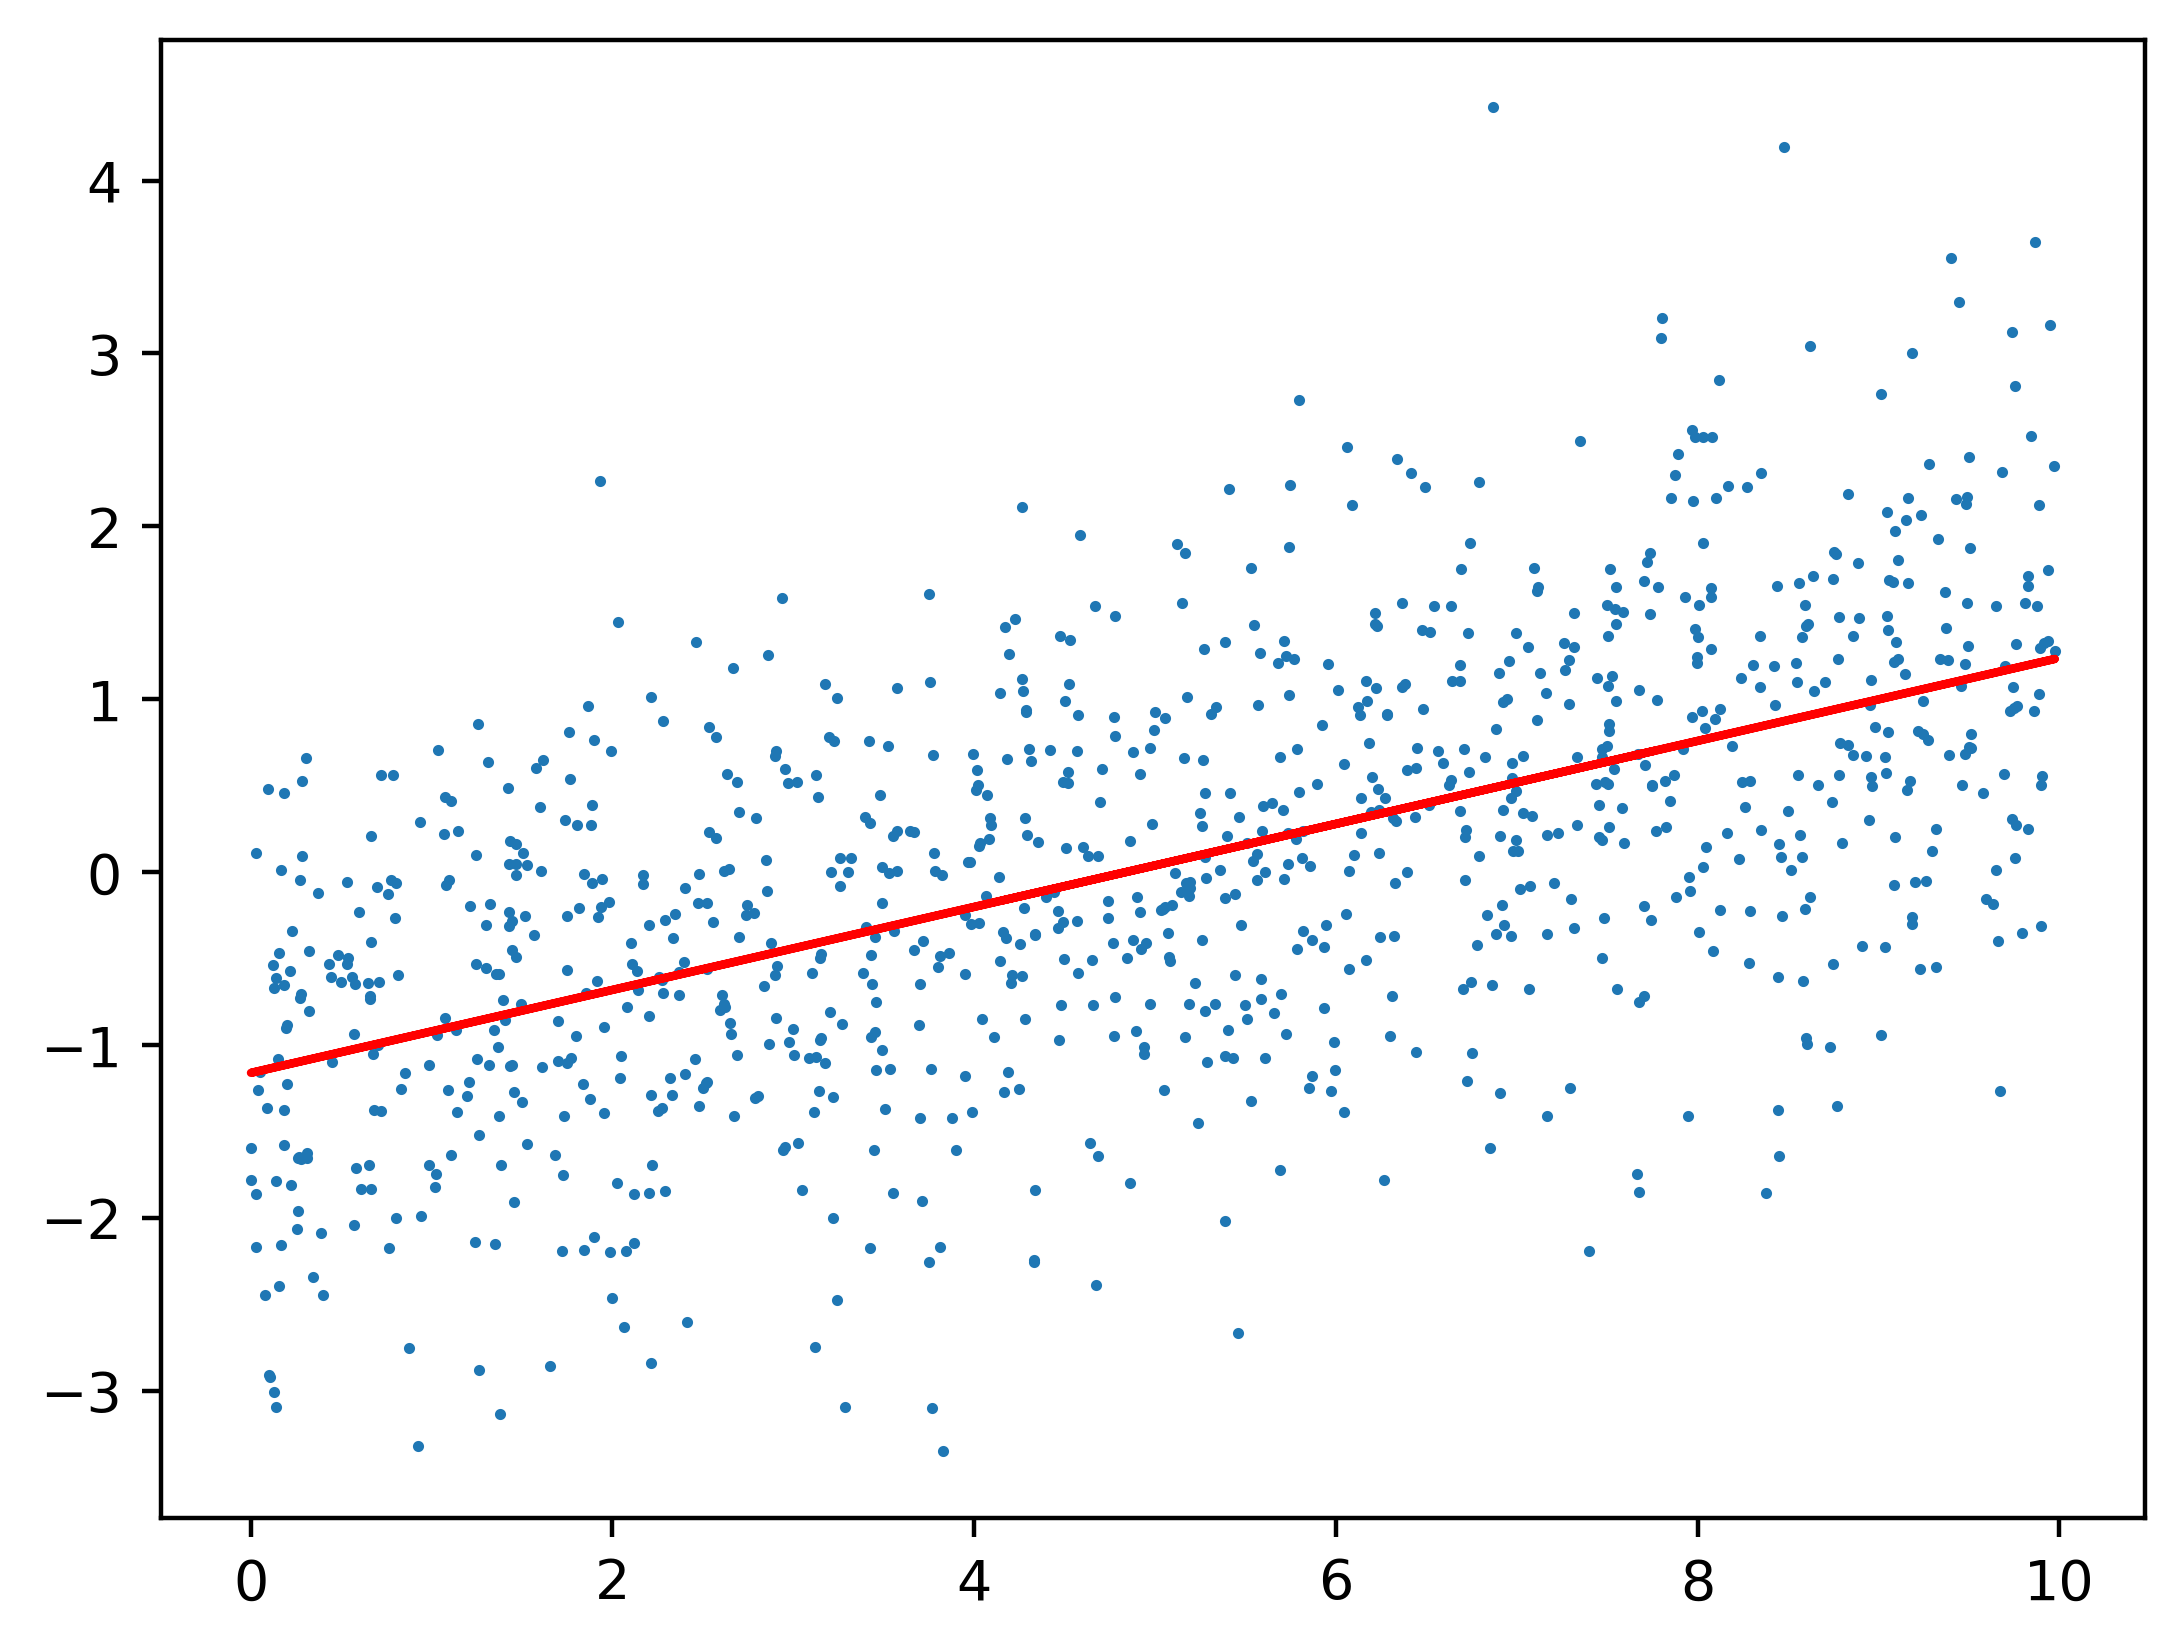

In [23]:
plt.scatter(X, y, s=1)
plt.plot(X, y_pred, "r")

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
df["EDUCATION"].values.reshape(-1, 1), df["default payment next month"].values, 
    test_size=0.2, random_state=24)

In [25]:
# verify size of test and train data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [26]:
print(np.mean(Y_train))
print(np.mean(Y_test))

0.223102526838873
0.21657603600225014


In [27]:
# classification accuracy
example_lr = LogisticRegression()
example_lr.C = 0.1
example_lr.solver = "liblinear"

In [28]:
example_lr.fit(X_train, Y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [29]:
y_pred = example_lr.predict(X_test)

is_correct = y_pred == Y_test
np.mean(is_correct)

0.7834239639977498

In [30]:
example_lr.score(X_test, Y_test)

0.7834239639977498

In [31]:
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred)

0.7834239639977498

## Confusion Matrix
* True Positive Rate (TPR, Recall or Sensitivity) - TPR = TP / P     
* False Negative Rate (FNR) - FNR = FN / P      
* True Neagtive Rate (TNR or Specificity) - TNR = TN / N  
* False Positive Rate (FPR) - FPR = FP / N  
* P - total real positives  
* N - total real negatives  
It can be concluded that:  
TPR + FNR = 1

In [32]:
# total positives (real)
P = sum(Y_test)
P

1155

In [33]:
# true positives (predicted) 
TP = sum((Y_test==1) & (y_pred==1))
print(f"{TP=}")

TPR = TP / P
print(f"{TPR=}")

TP=0
TPR=0.0


In [34]:
# false negatives predicted
FN = sum((Y_test==1) & (y_pred==0))
print(f"{FN=}")

FNR = FN / P
print(f"{FNR=}")

FN=1155
FNR=1.0


In [35]:
N = sum(Y_test==0)
print(f"{N=}")

TN = sum((Y_test==0) & (y_pred==0))
print(f"{TN=}")

N=4178
TN=4178


In [36]:
FP = sum((Y_test==0) & (y_pred==1))
print(f"{FP=}")

FP=0


In [37]:
TNR = TN / N
FPR = FP / N
print(f"{TNR=} and {FPR=}")

TNR=1.0 and FPR=0.0


In [38]:
# create a confusion matrix with scikit
metrics.confusion_matrix(Y_test, y_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

The model predicts correctly all negative values and incorrectly all the positive values.  
__That is not good, the model predicts everything as negative.__

Logistics Regression model returns a probability between 0 and 1. To be classified as 0 or 1 (true or false) it usually uses 0.5 as a parameter that will classify as 0 or 1.  
Above 0.5 is positive and below 0.5 is negative. This parameter is defined as 0.5, but it can be changed.

In [39]:
# obtain predicted probabilities
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

# the left column is the probability of the value to be false (0) and the right column to be true (1)

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [42]:
# the sum of each line is always 1
proba_sum = np.sum(y_pred_proba, 1)
print(proba_sum)
print(proba_sum.shape)
print(np.unique(proba_sum))

[1. 1. 1. ... 1. 1. 1.]
(5333,)
[1.]


In [43]:
# create an array only with the positive probabilities
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

Text(0, 0.5, 'Number of samples')

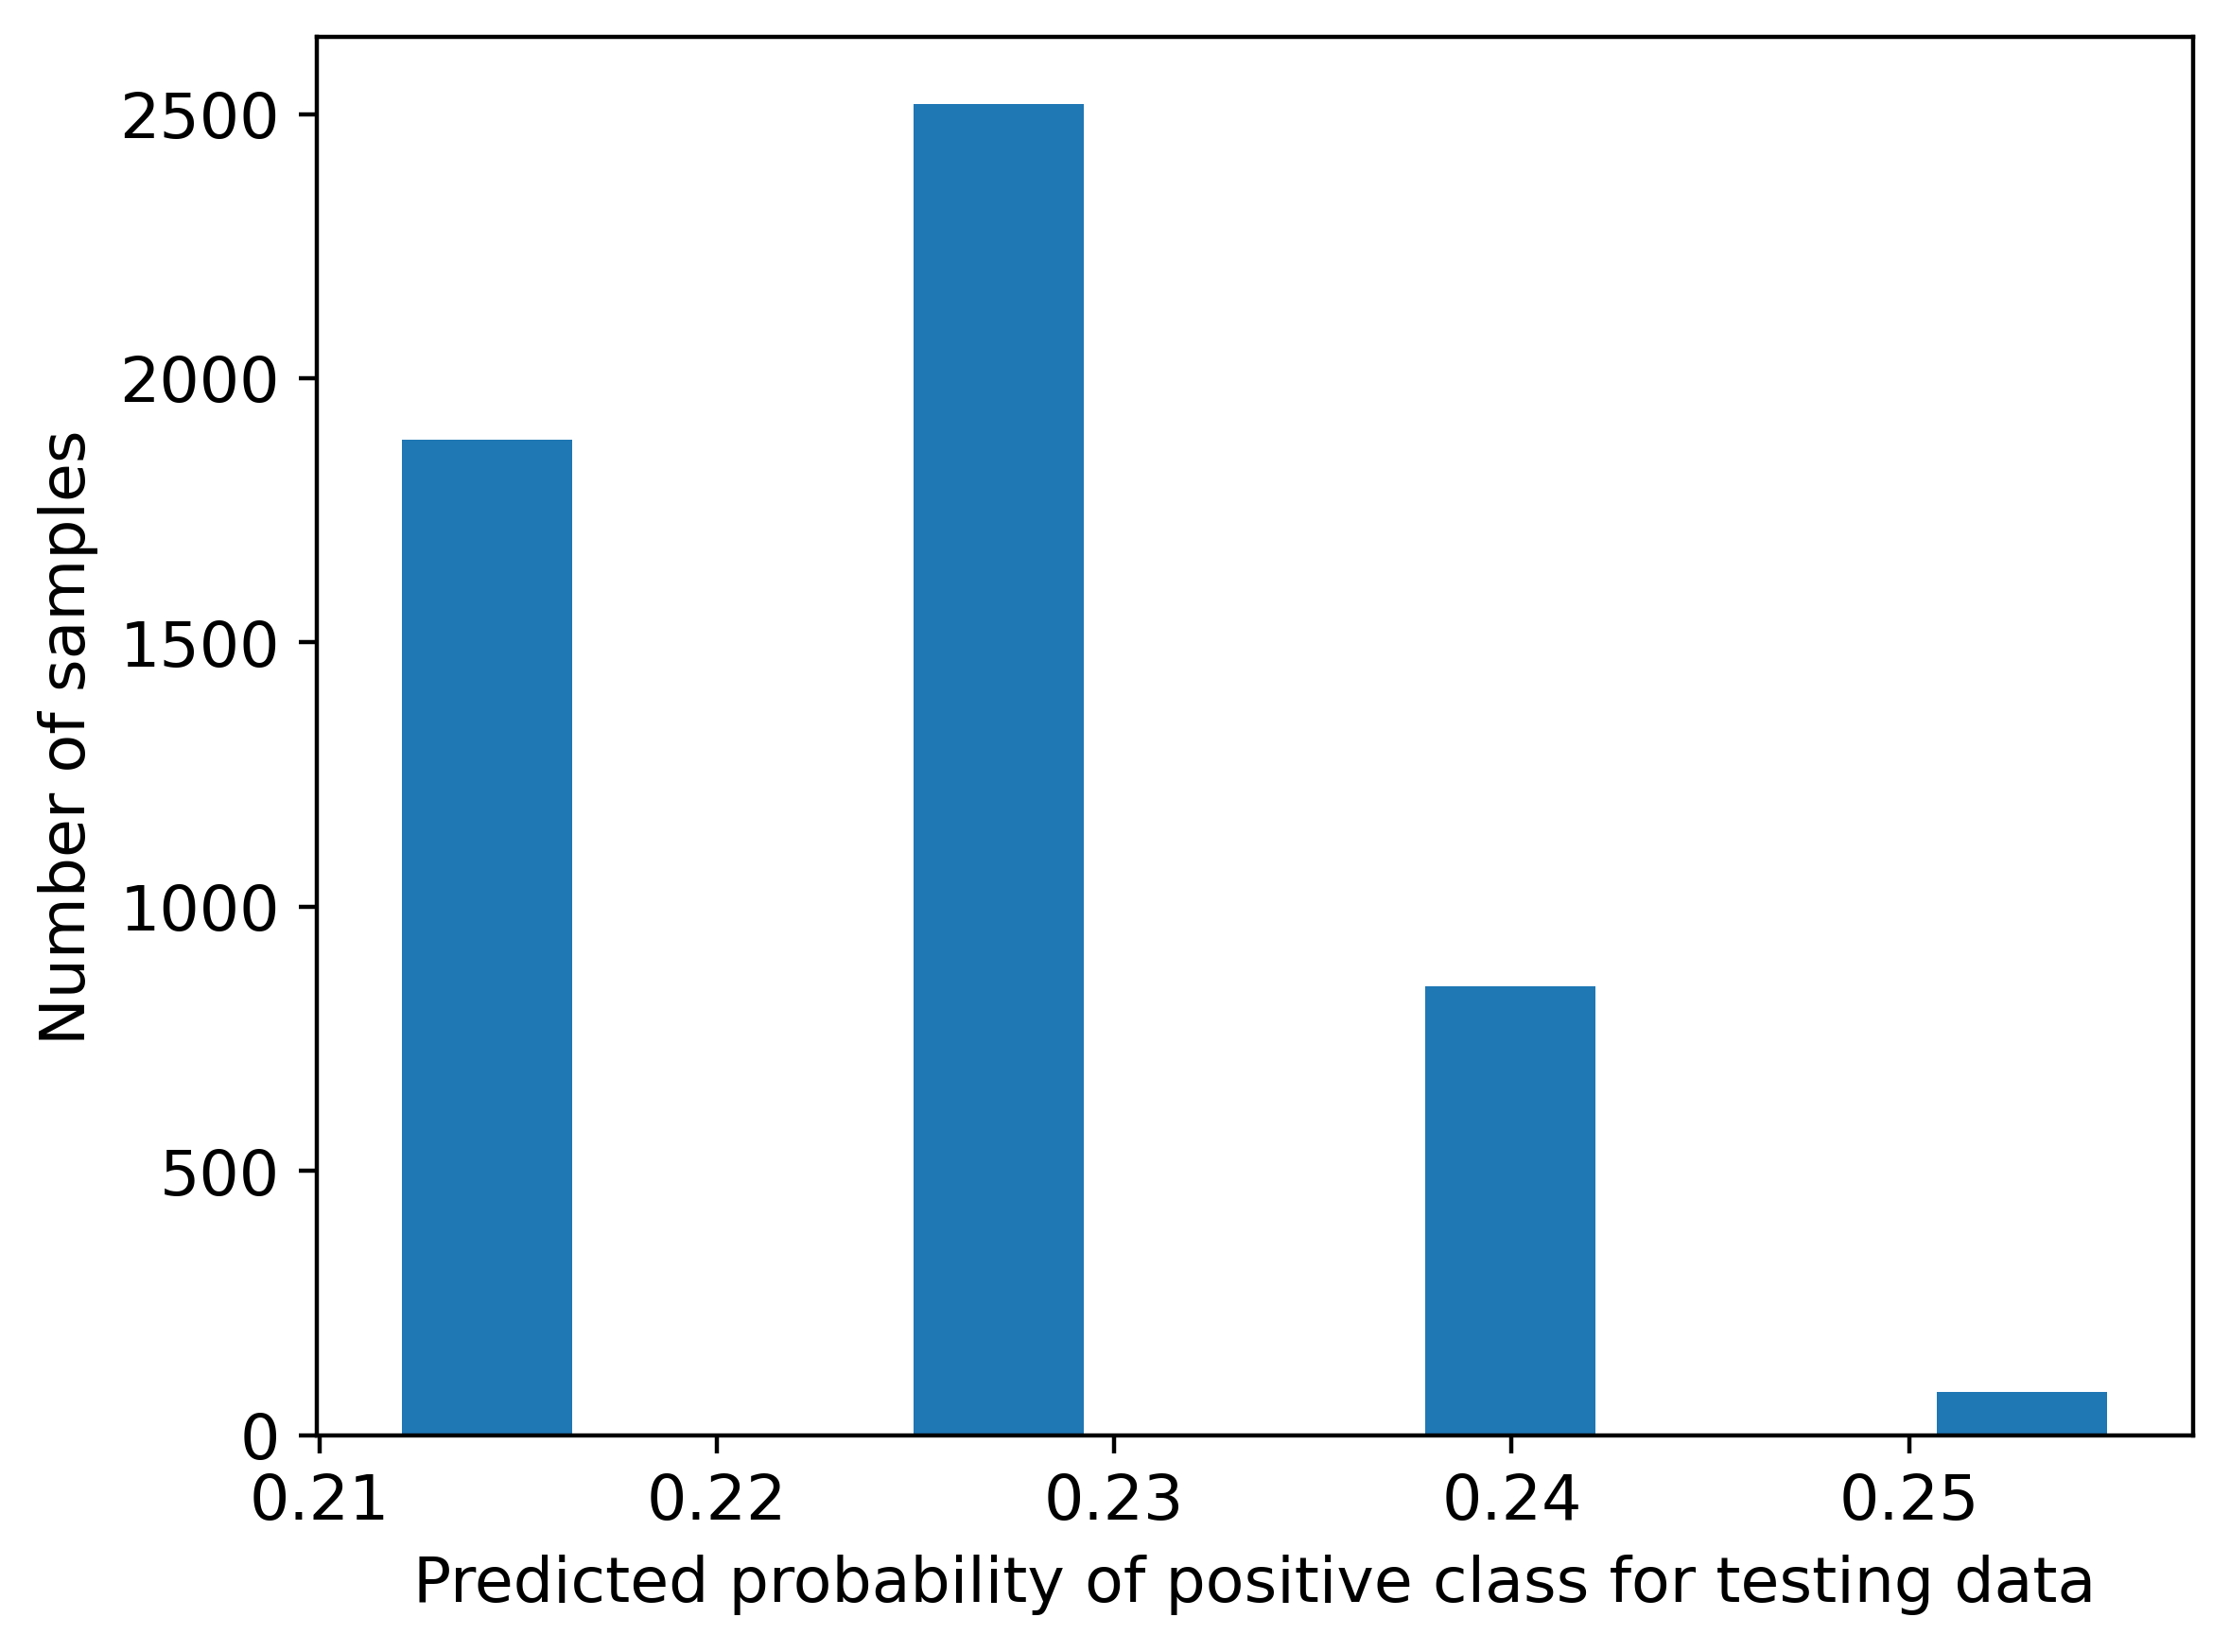

In [44]:
plt.rcParams["font.size"] = 12
plt.hist(pos_proba)
plt.xlabel("Predicted probability of positive class for testing data")
plt.ylabel("Number of samples")

Text(0, 0.5, 'Number of samples')

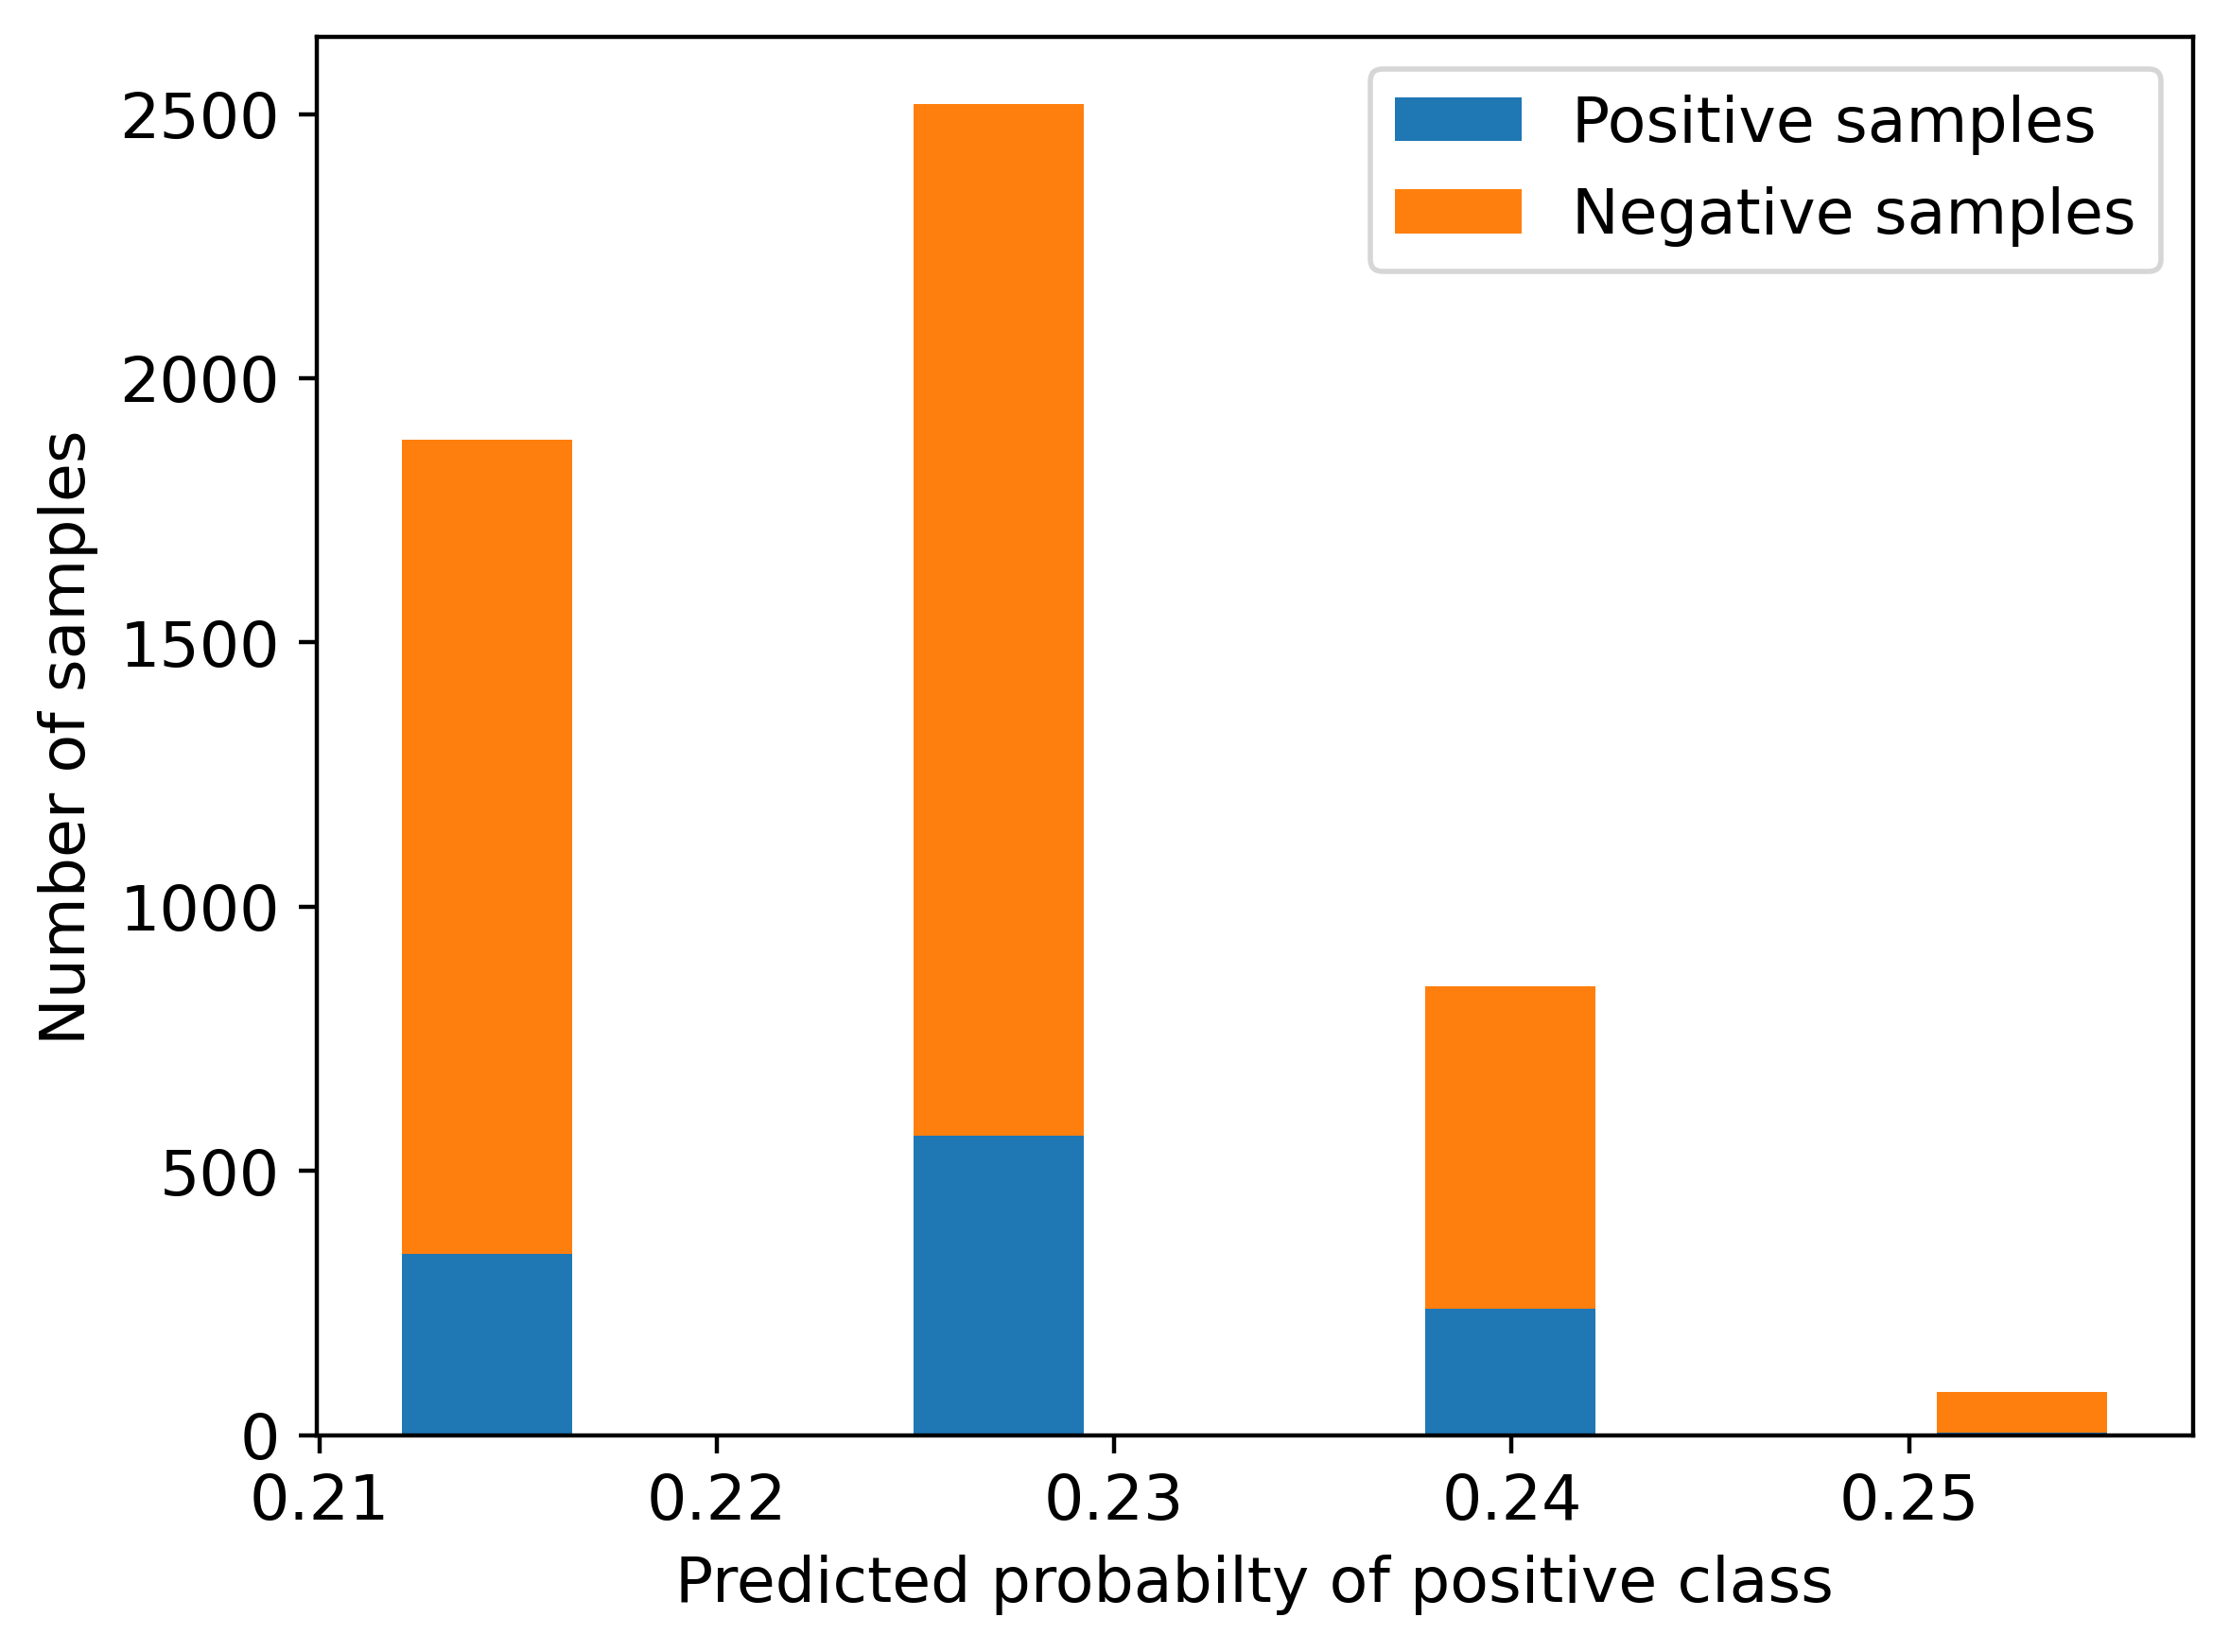

In [45]:
# plot with both positive and negative samples
pos_sample_pos_proba = pos_proba[Y_test==1]
neg_sample_pos_proba = pos_proba[Y_test==0]

plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(["Positive samples", "Negative samples"])
plt.xlabel("Predicted probabilty of positive class")
plt.ylabel("Number of samples")

## ROC curve (receiver operating characteristic)
ROC curve is the graphical representation used in binary classification to assess the performance of a predictive model at various classification thresholds. The ROC curve illustrates the trade-off between the sensitivity (true positive rate) and specificity (true negative rate) of a model across different threshold values for predicting the positive class.

Text(0.5, 1.0, 'ROC curve')

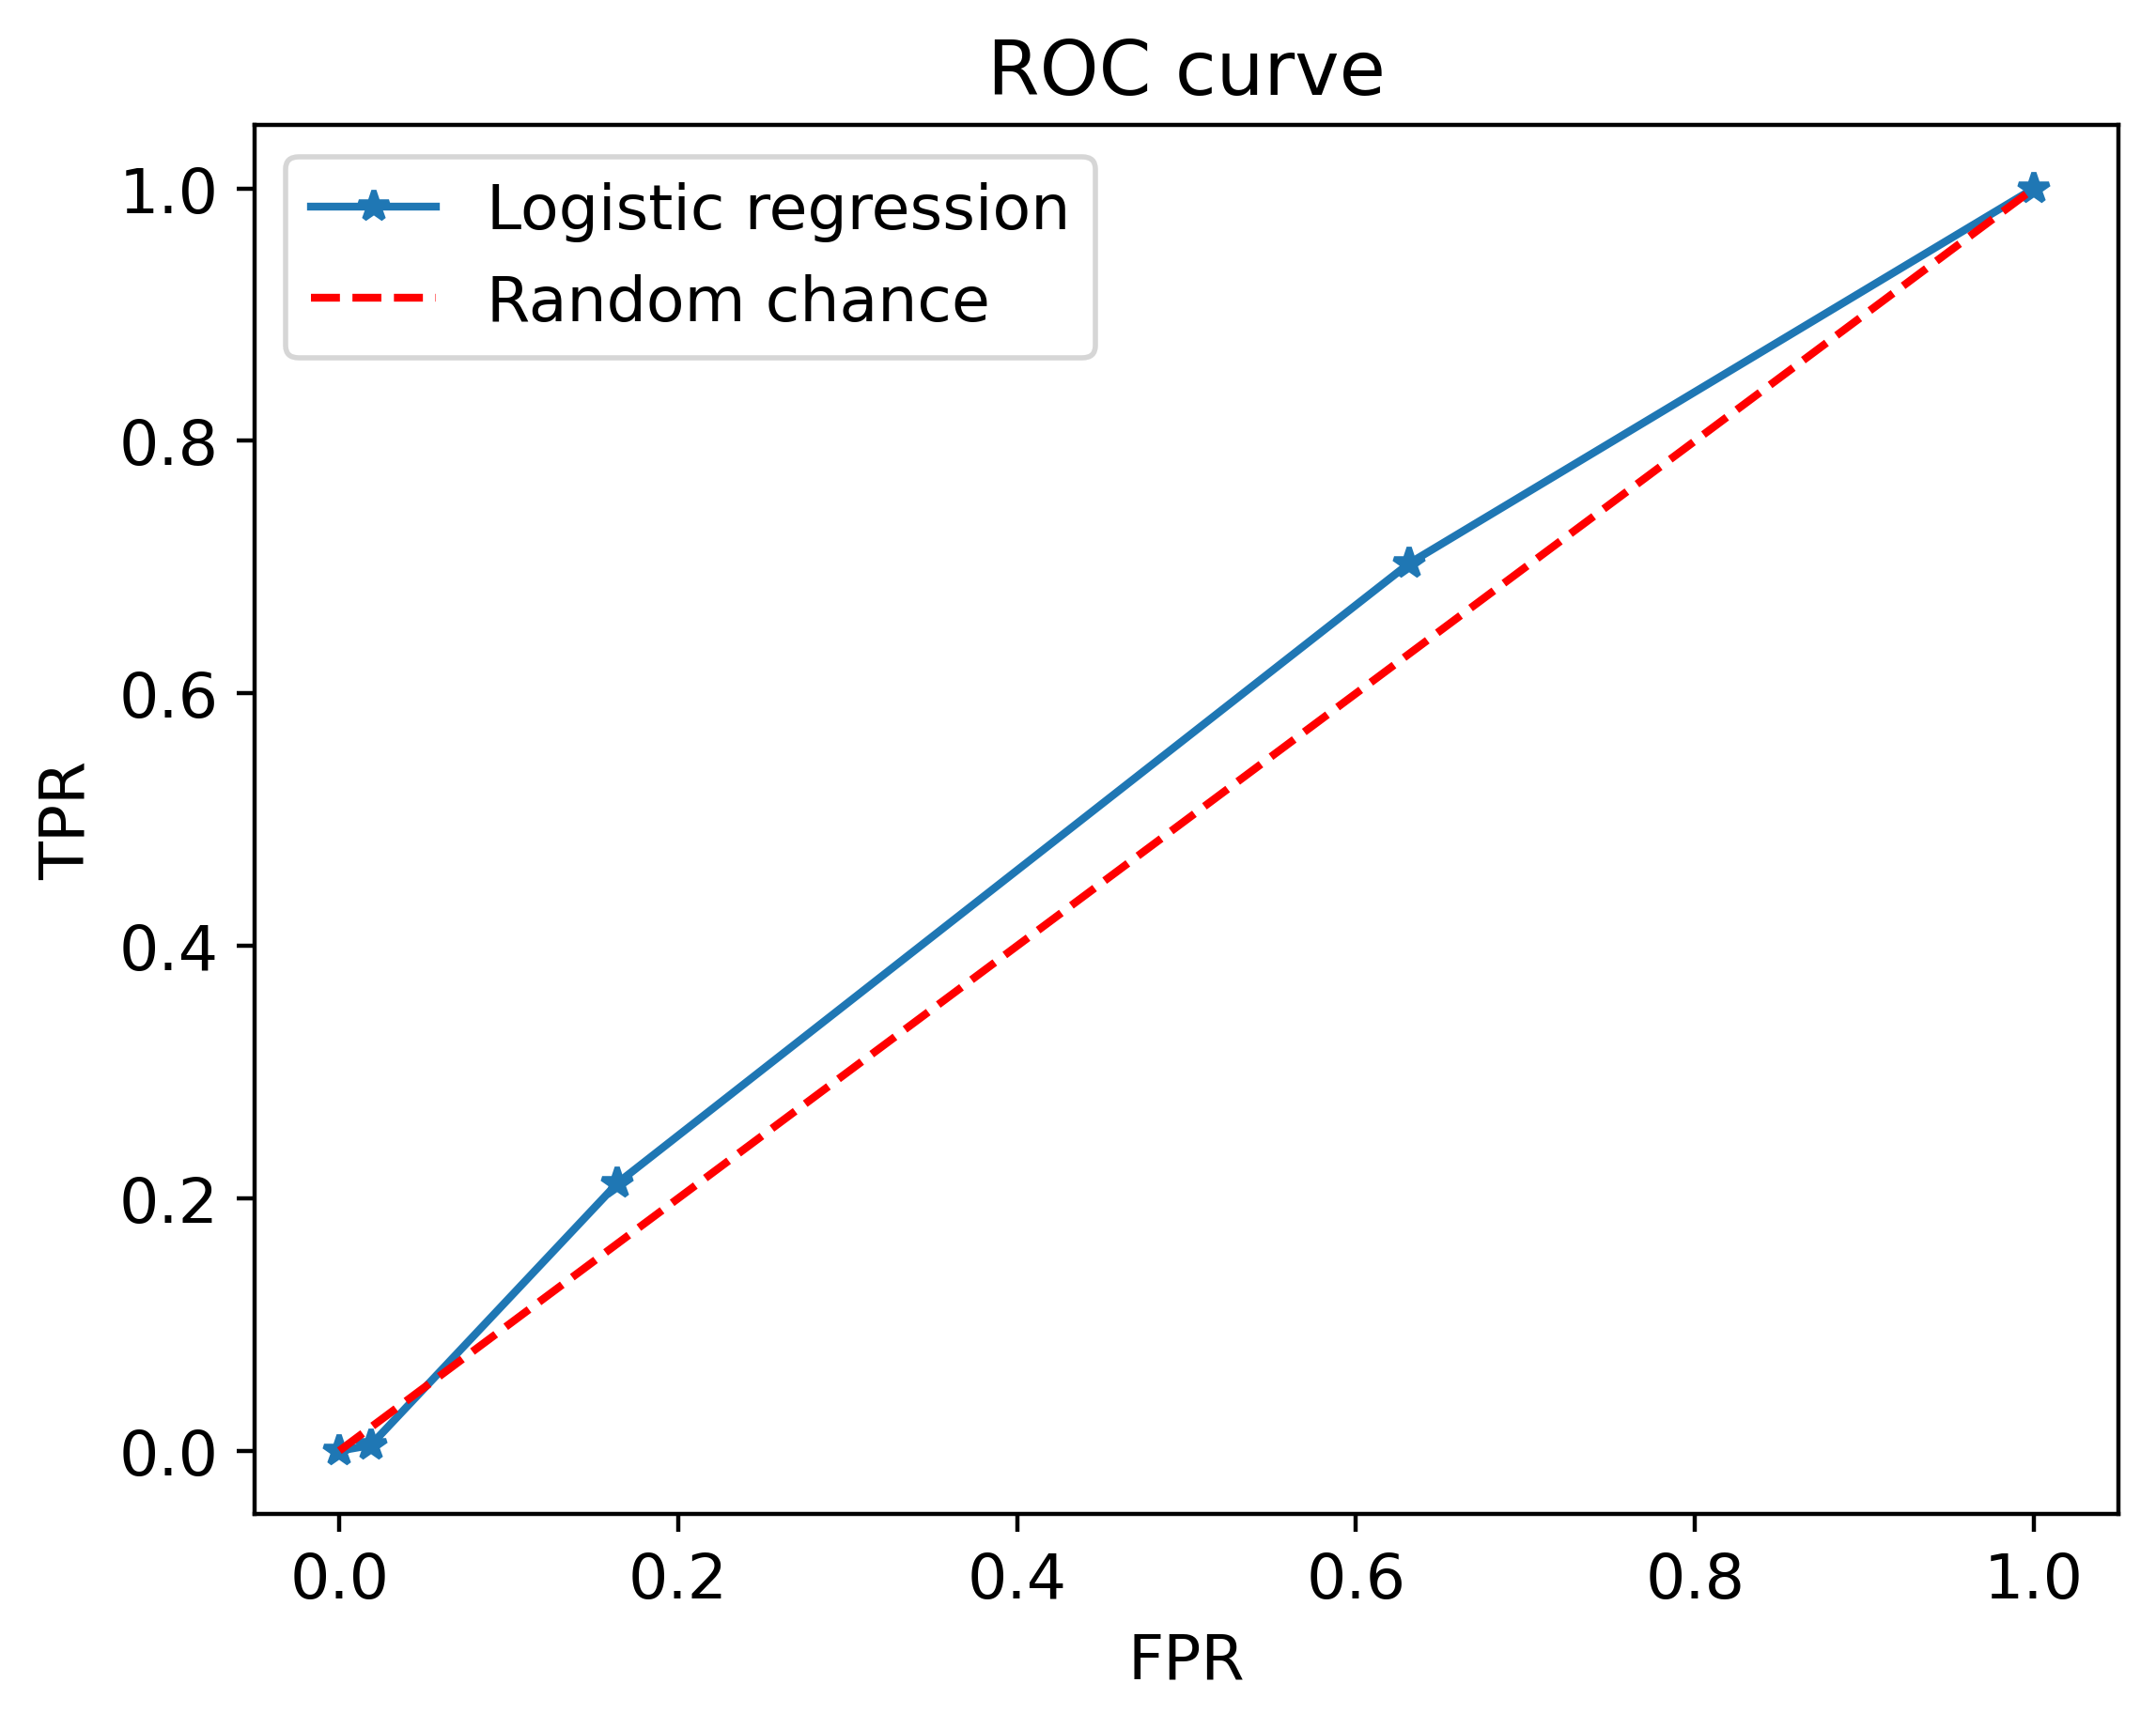

In [46]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pos_proba)

plt.plot(fpr, tpr, "*-")
plt.plot([0, 1], [0, 1], "r--")
plt.legend(["Logistic regression", "Random chance"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")

In [47]:
print(thresholds)

[       inf 0.2549944  0.24007604 0.22576598 0.21207085]


The AUC (area under the curve) would be 1 if the classifier was perfect.  
The plot generated of the perfect classifier would be a line from (0, 0) to (0, 1) and to (1, 1).  
The AUC obtained from the real model is shown below.
And it is not much better than the random chance showed above, which is like tossing a coin.

In [48]:
metrics.roc_auc_score(Y_test, pos_proba)

0.5434650477972642

### Applying logistic regression using LIMIT_BALL as independet variable

In [104]:
new_y = df["default payment next month"].values
new_x = df["LIMIT_BAL"].values.reshape(-1, 1)
new_x

array([[ 20000],
       [120000],
       [ 90000],
       ...,
       [ 30000],
       [ 80000],
       [ 50000]], dtype=int64)

In [105]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(
    new_x, new_y, 
    test_size=0.2, random_state=24)

In [106]:
new_log_reg = LogisticRegression(C=0.1, class_weight=None, dual=False,
                               fit_intercept=True,
                              intercept_scaling=1, max_iter=100, multi_class="auto",
                              n_jobs=None, penalty="l2", random_state=None, solver="liblinear",
                              tol=0.0001, verbose=0, warm_start=False)

In [107]:
new_log_reg.fit(new_x_train, new_y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [125]:
new_y_test_pred_proba = new_log_reg.predict_proba(new_x_test)
new_y_test_pred_proba

# converting probabilities to labels using a threshold of 0.5
new_y_test_pred = np.argmax(new_y_test_pred_proba, axis=1)

In [127]:
metrics.confusion_matrix(new_y_test, new_y_test_pred)

array([[4178,    0],
       [1155,    0]], dtype=int64)

In [115]:
print(new_log_reg.score(new_x_test, new_y_test))
metrics.roc_auc_score(new_y_test, new_y_test_pred_proba[:, 1])
# verify that the AUC is higher than when "EDUCATION" was used
# which means that the variable LIMIT_BAL (which is a fincancial variable) is a better indicator than
# the one used before

0.7834239639977498


0.6201990844642832

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

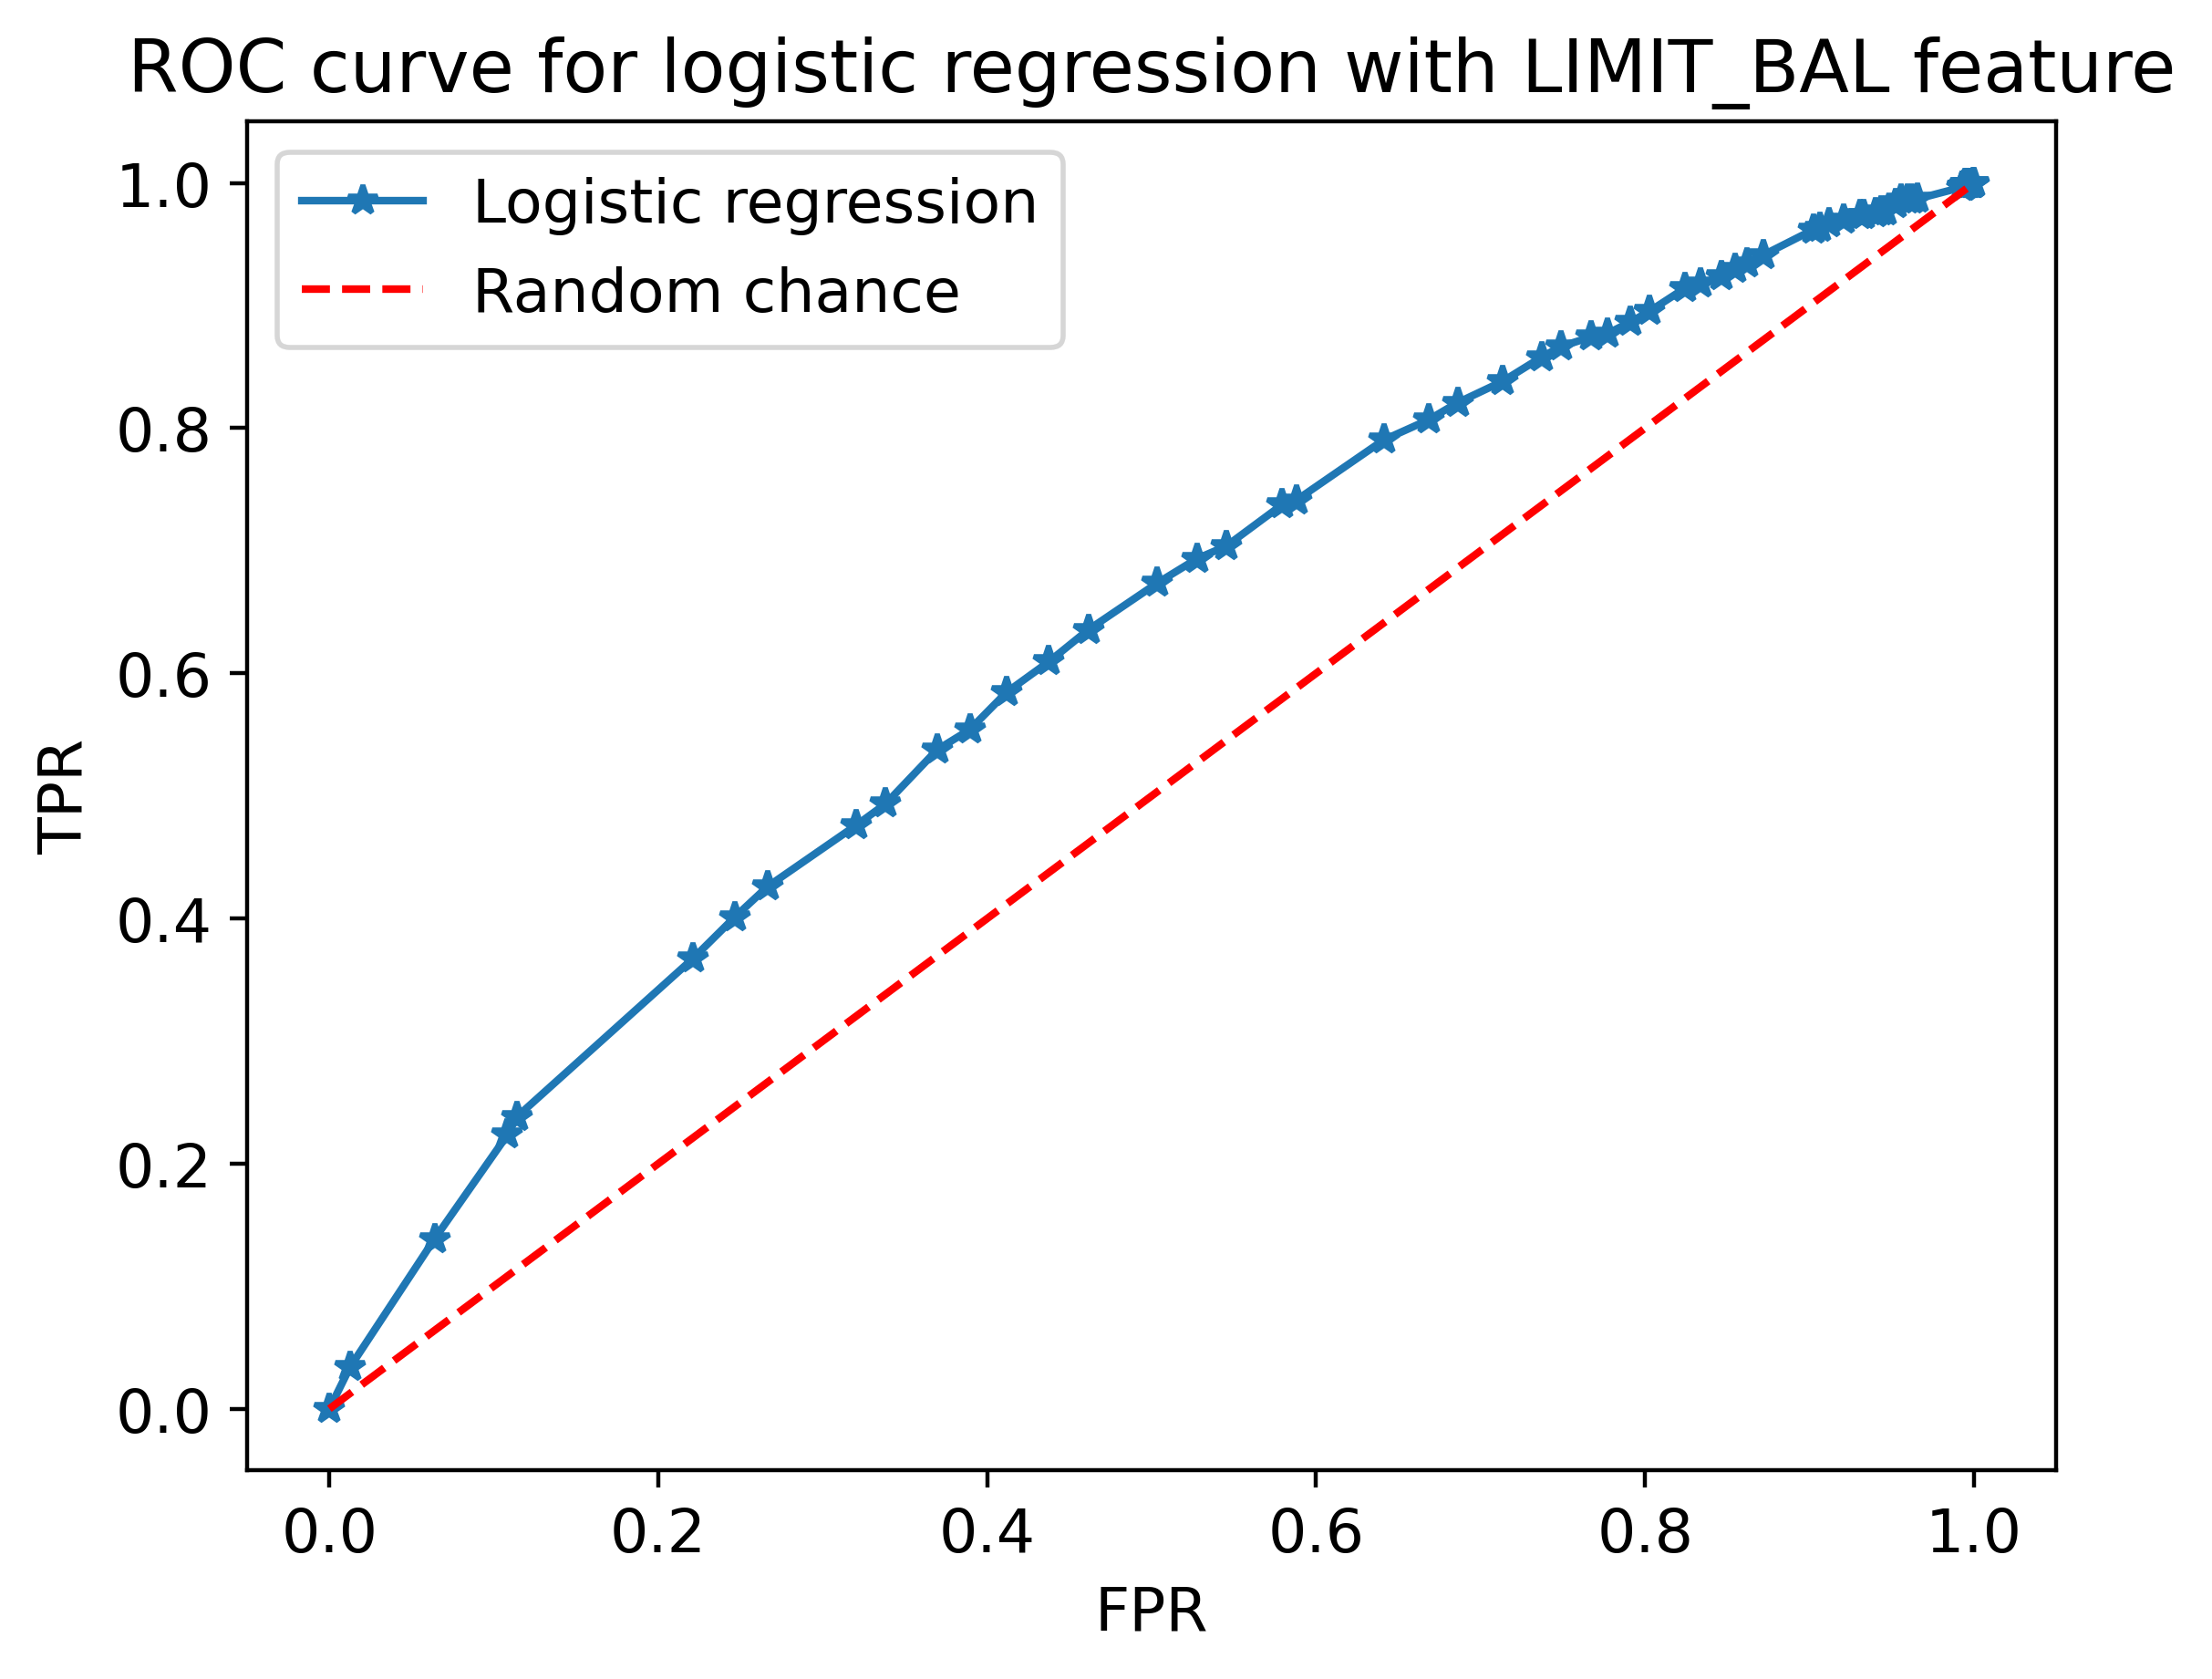

In [117]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(new_y_test, new_y_test_pred_proba[:, 1])

plt.plot(fpr2, tpr2, "*-")
plt.plot([0, 1], [0, 1], "r--")
plt.legend(["Logistic regression", "Random chance"])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for logistic regression with LIMIT_BAL feature")

(0.0, 1.0)

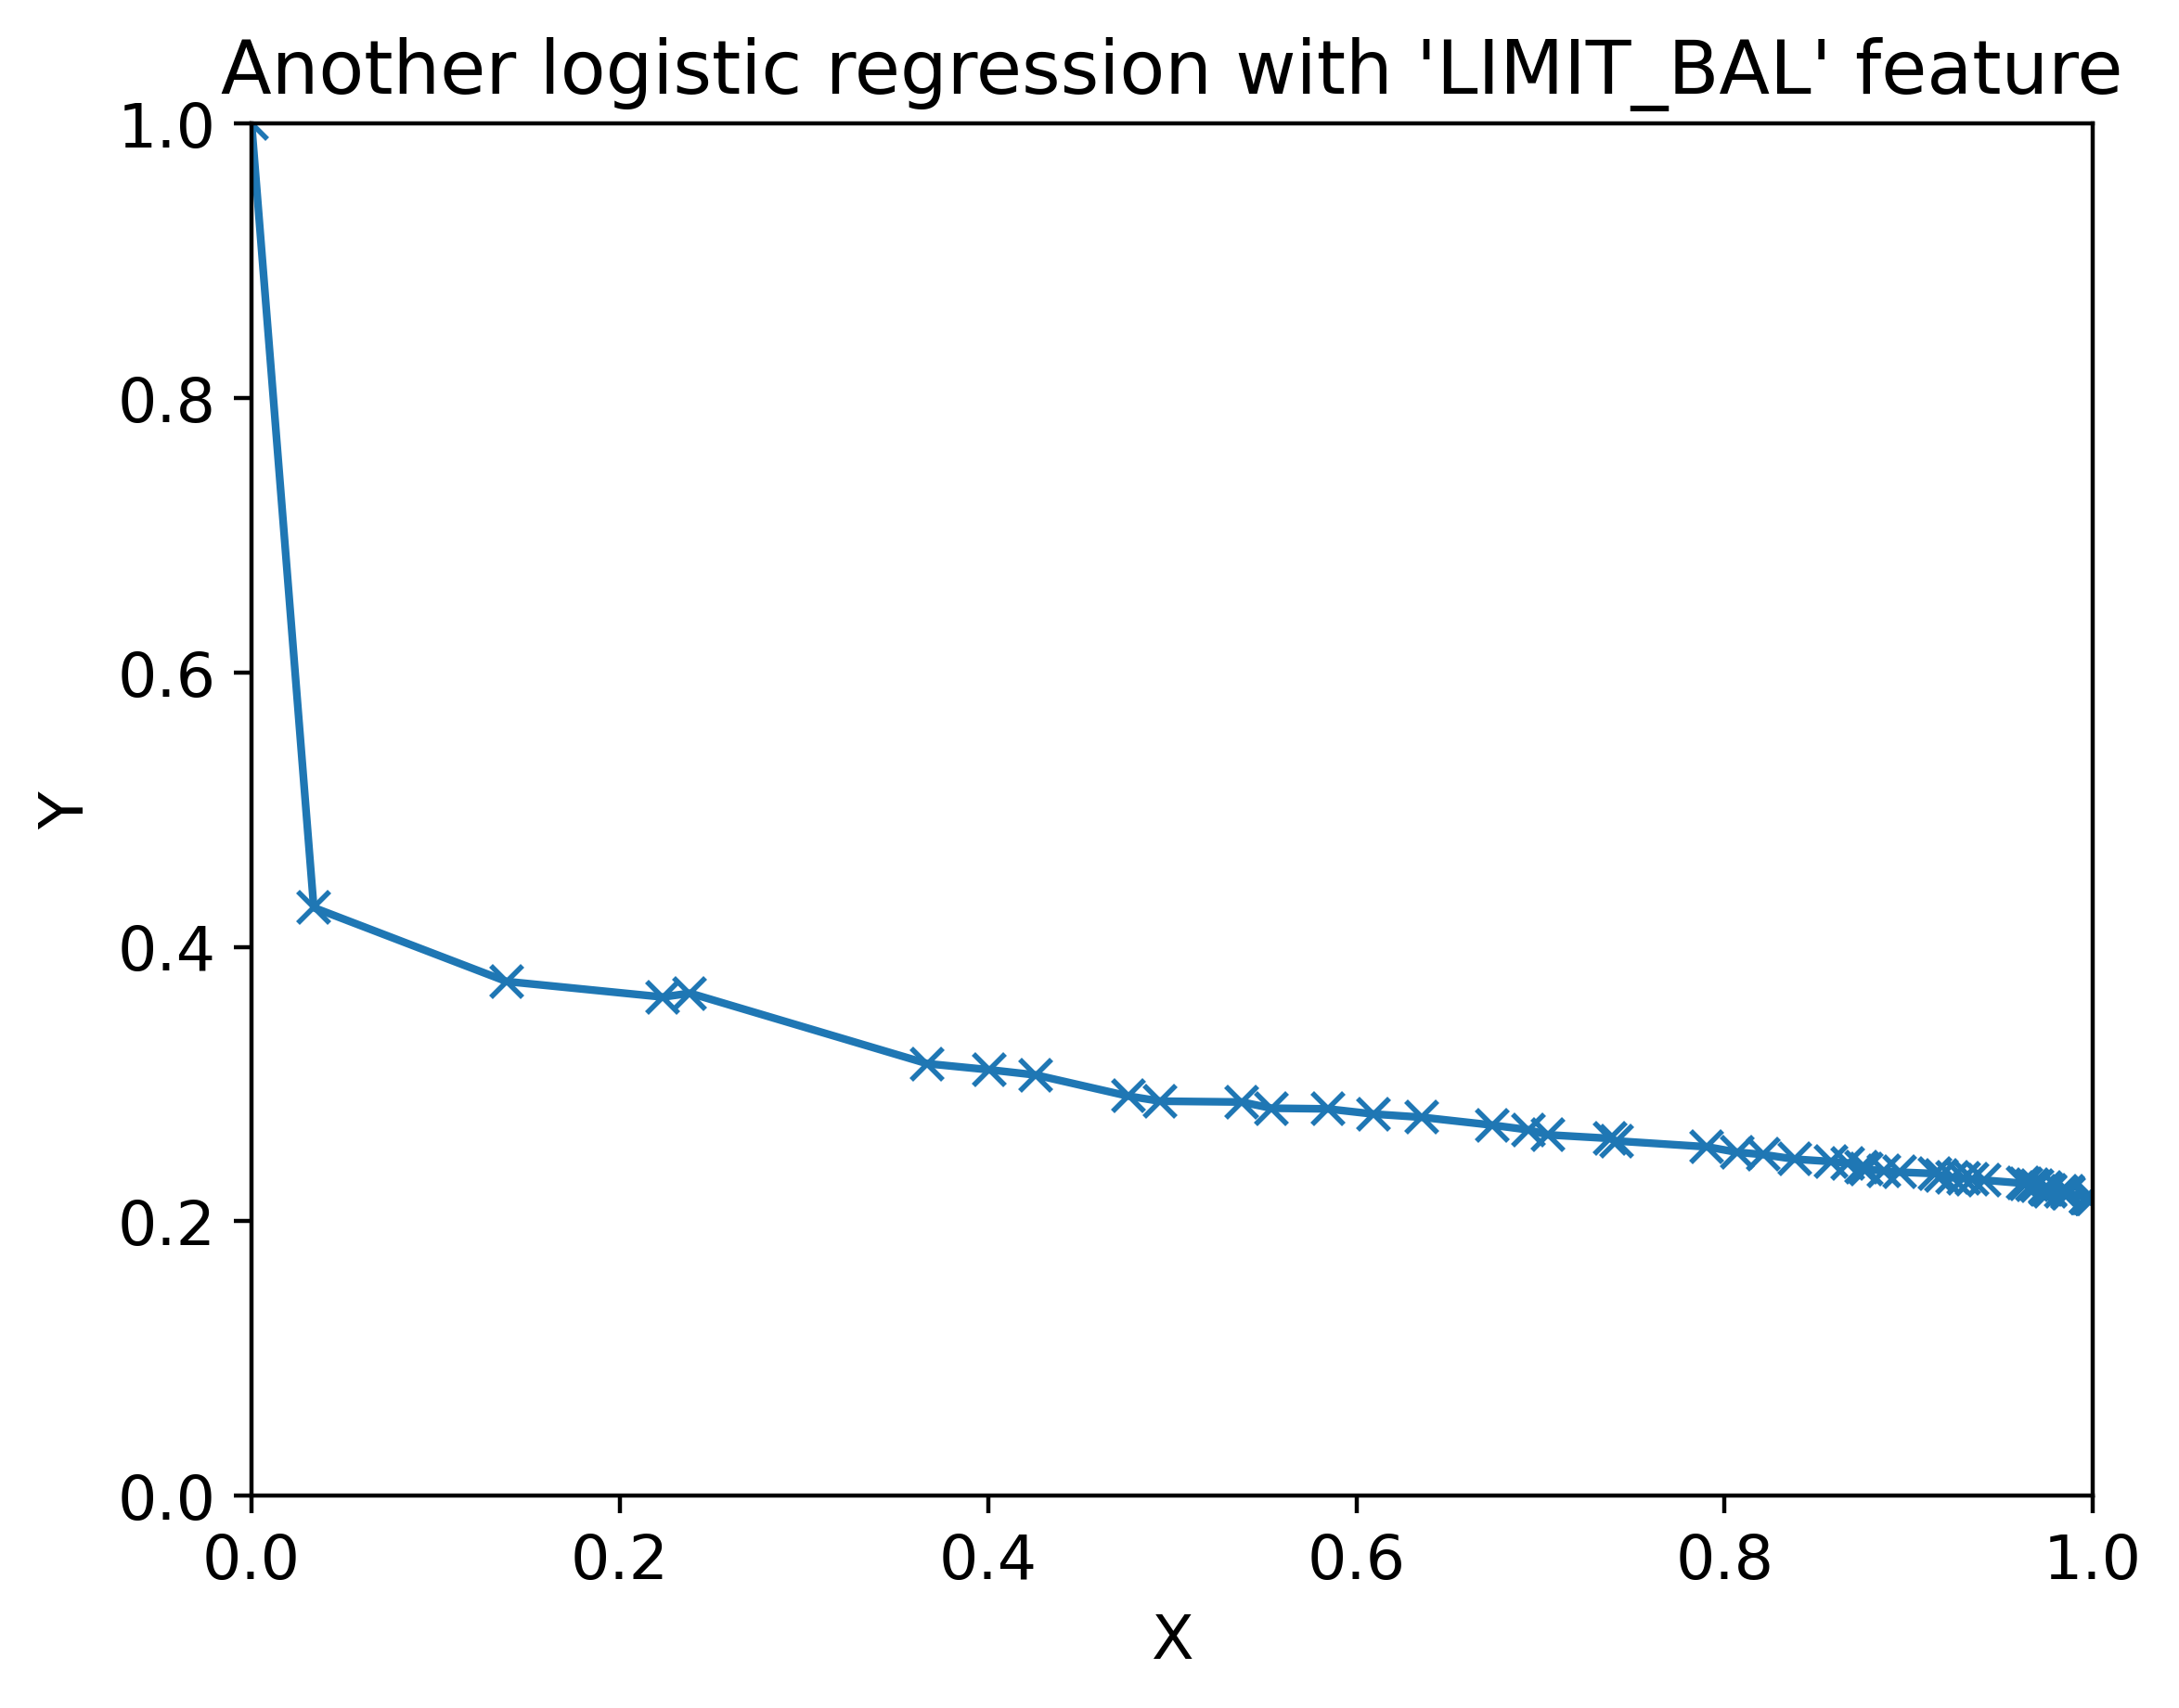

In [129]:
precision, recall, thresh3 = metrics.precision_recall_curve(new_y_test, new_y_test_pred_proba[:, 1])

plt.plot(recall, precision, "-x")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Another logistic regression with 'LIMIT_BAL' feature")
plt.xlim([0, 1])
plt.ylim([0, 1])

In [130]:
metrics.auc(recall, precision)

0.31566964427378624

In [132]:
# use the model to predict the training data
# ROC curve and AUC from this prediction
# the score of the training and test data are similiar,
# which means that the model is adapting well to  new data
new_y_test_pred_proba2 = new_log_reg.predict_proba(new_x_train)
metrics.roc_auc_score(new_y_train, new_y_test_pred_proba2[:, 1])

0.6182918113358344